Importing Libraries

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
import matplotlib.pyplot as plt


Obtaining model results

In [3]:

from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
dataset_path = '/content/drive/My Drive/ML CW/bank.csv'
data = pd.read_csv(dataset_path, sep=';')

# Preprocess the data
data_encoded = pd.get_dummies(data, drop_first=True)  # One-hot encode categorical features
X = data_encoded.drop('y_yes', axis=1)  # Features
y = data_encoded['y_yes']  # Target

# Convert to NumPy arrays for TensorFlow compatibility
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Split the dataset into 50% training and 50% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train the model
rf_predictions = rf_model.predict(X_test)  # Make predictions

# Neural Network Classifier
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),      # Hidden layer
    Dense(16, activation='relu'),      # Hidden layer
    Dense(1, activation='sigmoid')     # Output layer for binary classification
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)  # Train the model
nn_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")  # Make predictions

Mounted at /content/drive
Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4177 - loss: 126.0063 - val_accuracy: 0.7810 - val_loss: 8.7860
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 4.6103 - val_accuracy: 0.8031 - val_loss: 1.2796
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8360 - loss: 0.8610 - val_accuracy: 0.7810 - val_loss: 0.9841
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8494 - loss: 0.6944 - val_accuracy: 0.8142 - val_loss: 0.8362
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.8684 - val_accuracy: 0.8628 - val_loss: 0.8269
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.8143 - val_accuracy: 0.8496 - val_loss: 1.2328
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.8301 - val_accuracy: 0.8850 - val_loss: 2.1367
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 1.2666 - val_

Compare Accuracy

In [4]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
nn_accuracy = accuracy_score(y_test, nn_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

Random Forest Accuracy: 0.8969482529854047
Neural Network Accuracy: 0.8500663423264042


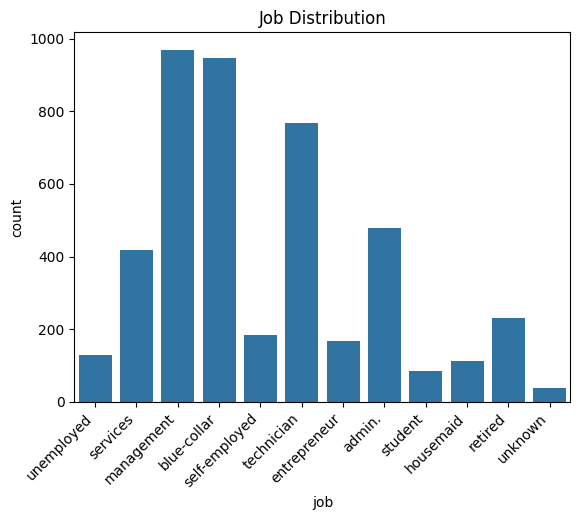

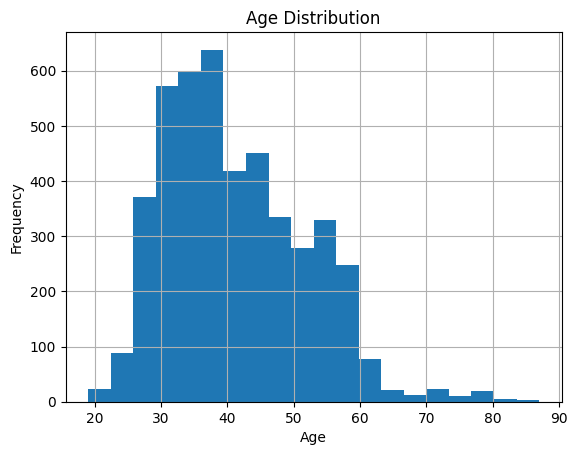

In [5]:
sns.countplot(x='job', data=data)
plt.title('Job Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()


data['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Visualize Accuracy Comparison


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      2014
         1.0       0.58      0.20      0.30       247

    accuracy                           0.90      2261
   macro avg       0.75      0.59      0.62      2261
weighted avg       0.87      0.90      0.87      2261


Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      2014
         1.0       0.35      0.63      0.45       247

    accuracy                           0.83      2261
   macro avg       0.65      0.74      0.68      2261
weighted avg       0.88      0.83      0.85      2261



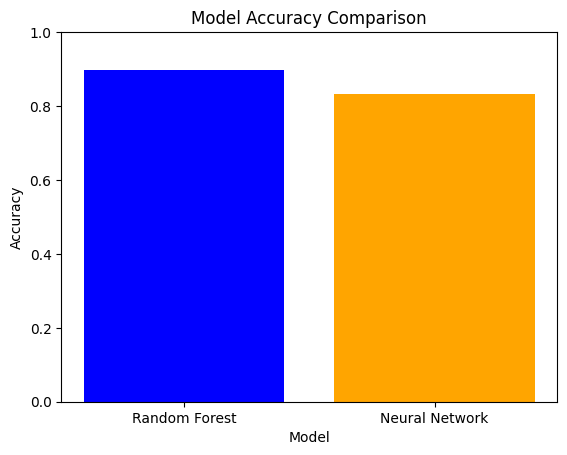

In [ ]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

# Visualize Accuracy Comparison
model_names = ['Random Forest', 'Neural Network']
accuracies = [rf_accuracy, nn_accuracy]

plt.bar(model_names, accuracies, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.show()

Summary Table

In [ ]:
results = pd.DataFrame({
    "Model": ["Random Forest", "Neural Network"],
    "Accuracy": [rf_accuracy, nn_accuracy]
})
print("\nSummary of Results:")
print(results)


Summary of Results:
            Model  Accuracy
0   Random Forest  0.896948
1  Neural Network  0.833260
